In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Dataset/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [6]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

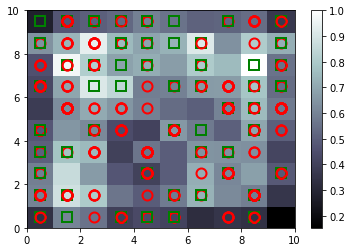

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [9]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15803378
15714087
15730793
15788776
15654859
15746995
15764444
15731989
15771409
15777893
15649379
15729771
15721507
15715519
15636562
15700046


In [10]:
customers = dataset.iloc[:, 1:].values

In [11]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [13]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [14]:
ann = tf.keras.models.Sequential()

In [15]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [16]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 3s 888us/step - loss: 0.5725 - accuracy: 0.8391
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2976 - accuracy: 0.9768
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1933 - accuracy: 0.9768
Epoch 4/10
690/690 [==============================] - 1s 940us/step - loss: 0.1517 - accuracy: 0.9768
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1315 - accuracy: 0.9768
Epoch 6/10
690/690 [==============================] - 1s 860us/step - loss: 0.1201 - accuracy: 0.9768
Epoch 7/10
690/690 [==============================] - 1s 814us/step - loss: 0.1126 - accuracy: 0.9768
Epoch 8/10
690/690 [==============================] - 1s 745us/step - loss: 0.1071 - accuracy: 0.9768
Epoch 9/10
690/690 [==============================] - 1s 957us/step - loss: 0.1025 - accuracy: 0.9768
Epoch 10/10
690/690 [==============================] - 1s 827us/step - loss: 0.0982 - ac

In [19]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [20]:
print(y_pred)

[[1.57901130e+07 1.74944873e-07]
 [1.55681620e+07 1.07514781e-04]
 [1.56700290e+07 1.31726265e-04]
 ...
 [1.56305920e+07 1.38789922e-01]
 [1.56365620e+07 1.50968671e-01]
 [1.58007730e+07 1.61397457e-01]]
